# The Cure for the Common Smog?

In response to the COVID-19 outbreak, India and its capital have been under lockdown since 24th March 2020. One of the few positives that have come from the situation is a stark improvement in the environment, which is good news for cities like Delhi that suffer from the ill-effects of smog each year, prompting its own Chief Minister to call the city a "gas-chamber".

We look at the data, and how a global pandemic has given the residents of New Delhi an oppurtunity to see what it would be like if all polluting human activities were restricted.

The data is sourced from [this](https://aqicn.org/data-platform/covid19/) real-time World Air Quality Index.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns

#Seaborn beautifiers for plotting 
sns.set(font= 'Nirmala UI',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context('notebook', rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [174]:
data = pd.read_csv('NewDelhi2020.csv')

In [115]:
data.head()

,Date,Country,City,Indicator,Count,Min,Max,Median,Vaiance
0,31-12-2019,IN,Delhi,pm25,880,20,999,248,240920.0
1,01-01-2020,IN,Delhi,pm25,874,102,999,392,314482.0
2,02-01-2020,IN,Delhi,pm25,881,101,920,349,225998.0
3,03-01-2020,IN,Delhi,pm25,851,65,729,255,185683.0
4,04-01-2020,IN,Delhi,pm25,835,110,537,268,71914.1


In [175]:
#convert to the friendlier Pandas datetime format
data.Date  = pd.to_datetime(data.Date, dayfirst = True)

First, let us look at how the PM 2.5 median value in New Delhi has changed since the day China announced a novel coronavirus on New Year's Eve. 

[Particulate Matter 2.5](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics) (PM 2.5 for short) is the simplest metric for air pollution levels.

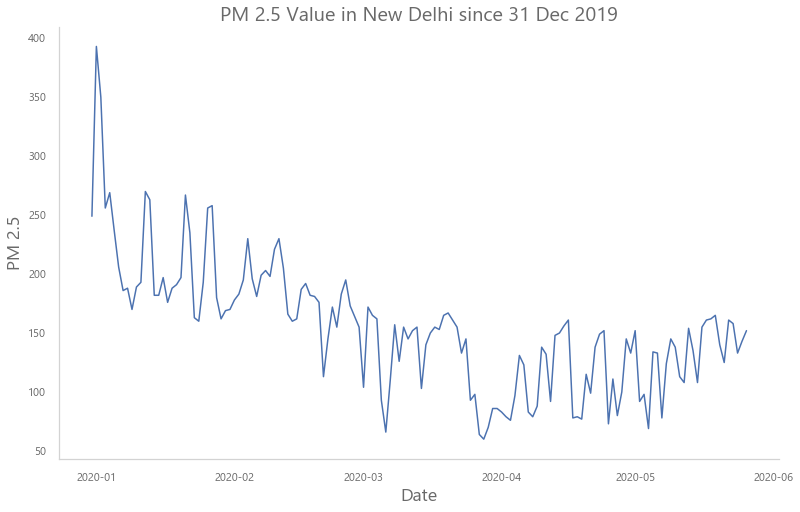

In [84]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_axes([0,0,1,1])
ax.set_title('PM 2.5 Value in New Delhi since 31 Dec 2019')
ax.plot(data.Date, data.Median)
ax.set_xlabel('Date')
ax.set_ylabel('PM 2.5')
#plt.style.use('seaborn-deep')
plt.show()

## Looking Back to 2019

If we go back by one year, we should expect to see what the pollution levels usually are in New Delhi during the first 5 months of the year. Let us try to see how different it is when vehicles, factories, and human activity in a city of millions is unrestricted.



In [172]:
olddata = pd.read_csv('NewDelhi2019First5.csv')
olddata.Date  = pd.to_datetime(olddata.Date, dayfirst = True)

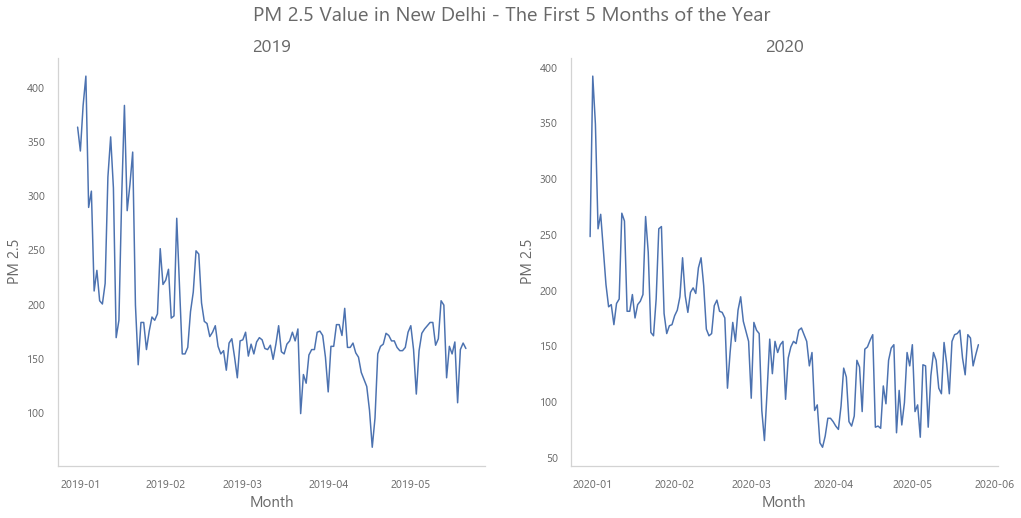

In [176]:
fig = plt.figure(figsize = (15, 7))

fig.suptitle('PM 2.5 Value in New Delhi - The First 5 Months of the Year', fontsize = 20)



ax1 = fig.add_subplot(121)
ax1.set_title('2019', fontsize = 18)
ax1.plot(olddata.Date, olddata.Median)
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_ylabel('PM 2.5', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.set_title('2020', fontsize = 18)
ax2.plot(data.Date, data.Median)
ax2.set_xlabel('Month', fontsize = 15)
ax2.set_ylabel('PM 2.5', fontsize = 15)


plt.show()

While it is true that the lockdown has caused a dramatic and steeper decline of the PM 2.5 levels, it can be seen that the annual trend is for the values to reduce during summer months anyways, coming down from the high levels they reach during the winter months when the air stagnates and a deadly smog envelops the city. Indeed, this can be seen when we zoom out and see the PM 2.5 levels for Delhi in the whole of 2019 - 


In [69]:
lastyear = pd.read_csv('NewDelhi2019.csv')
lastyear.Date  = pd.to_datetime(lastyear.Date, dayfirst = True)

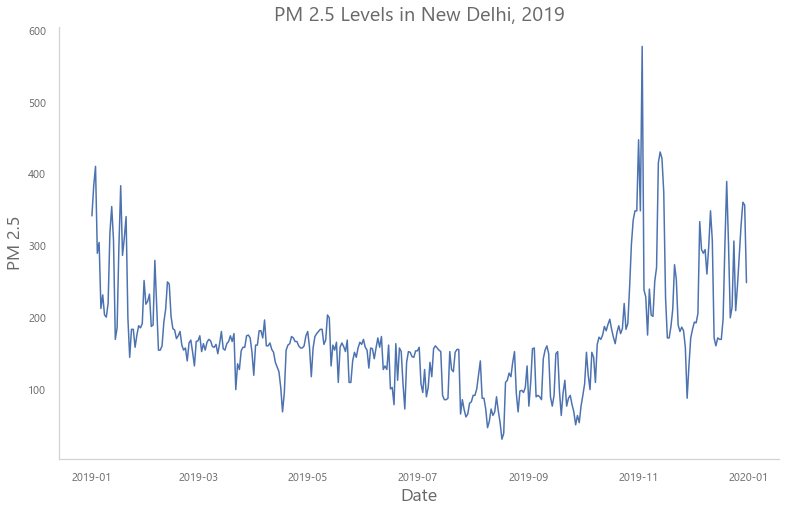

In [85]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_axes([0,0,1,1])
ax.set_title('PM 2.5 Levels in New Delhi, 2019')
ax.plot(lastyear.Date, lastyear.Median)
ax.set_xlabel('Date')
ax.set_ylabel('PM 2.5')

plt.show()

A [recent study](https://www.newindianexpress.com/cities/delhi/2020/may/12/air-pollution-levels-in-delhi-drop-by-49-post-lockdown-2142473.html) from IIT Delhi shows that 650,000 lives could be saved annually, if air pollution remained as low as it is during this lockdown.

Let us see the weekly drop in pollution levels using both PM 2.5 and Nitrous Dioxide (NO2) as metrics.

In [87]:
weeklydata = pd.read_csv('IndiaWeekly.csv')

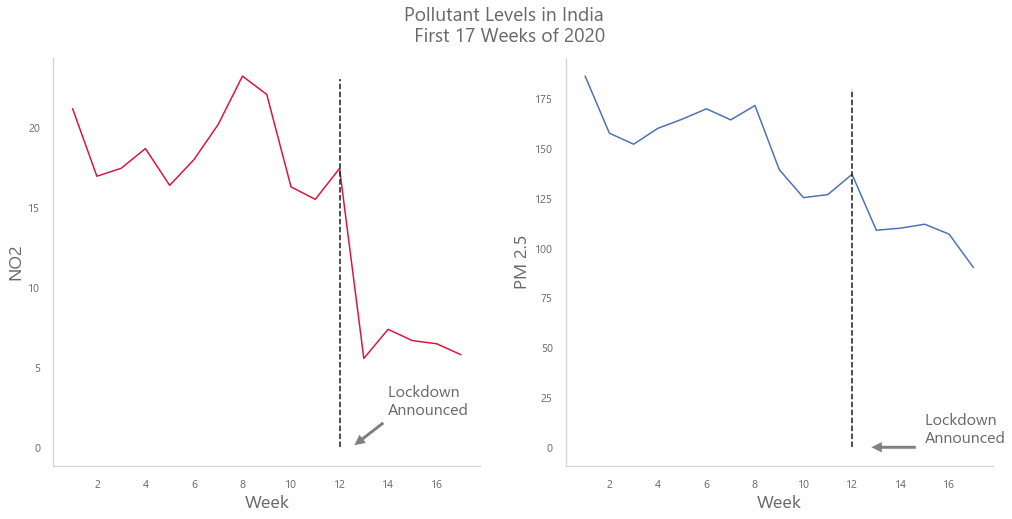

In [168]:
fig = plt.figure(figsize = (15, 7))
fig.suptitle('Pollutant Levels in India \n First 17 Weeks of 2020')

ax1 = fig.add_subplot(121)
ax1.plot(weeklydata.Weeks, weeklydata.NO2, color = 'crimson')
ax1.plot([12, 12], [0, 23], 'k--')
ax1.annotate('Lockdown \nAnnounced', xy=(12.5, 0), xytext=(14, 2),
            arrowprops=dict(facecolor='grey', shrink=0.05))
ax1.set_xlabel('Week')
ax1.set_ylabel('NO2')


ax2 = fig.add_subplot(122)
ax2.plot(weeklydata.Weeks, weeklydata.PM25)
ax2.plot([12, 12], [0, 180], 'k--')
ax2.annotate('Lockdown \nAnnounced', xy=(12.5, 0), xytext=(15, 2),
            arrowprops=dict(facecolor='grey', shrink=0.1))
ax2.set_xlabel('Week')
ax2.set_ylabel('PM 2.5')

plt.show()

The NO2 levels speak for themselves; the sharp drop comes from the sudden absence of vehicles from the roads. 
However, the PM2.5 doesn’t reflect changes that much.

# Attempts to Fight Air Pollution in the Pre-Corona Age

Before the virus had brought vehicular traffic to a standstill, the Delhi administration tried implememnting an "Odd-Even" Scheme to reduce the number of cars on roads and hence tackle pollution in the winter months. Let us see how effective these attempts were. The latest Odd-Even Scheme was enforced from November 4-15 2019. 

While the scheme did noticeably reduce traffic on the streets of the nation's capital, there are [claims](https://theprint.in/india/governance/delhis-odd-even-scheme-was-a-50-50-bet-that-ended-as-a-100-failure/46990/) that it isn't strict enough to bring about real change. The scheme exempts two-wheelers, for example. Looking at the graphs below we can see that these rules didn't really change the actual pollutant levels. 

In [93]:
nov2019 = lastyear.loc[(lastyear['Date'] >=  '2019-11-01')&(lastyear['Date'] <= '2019-11-29')]

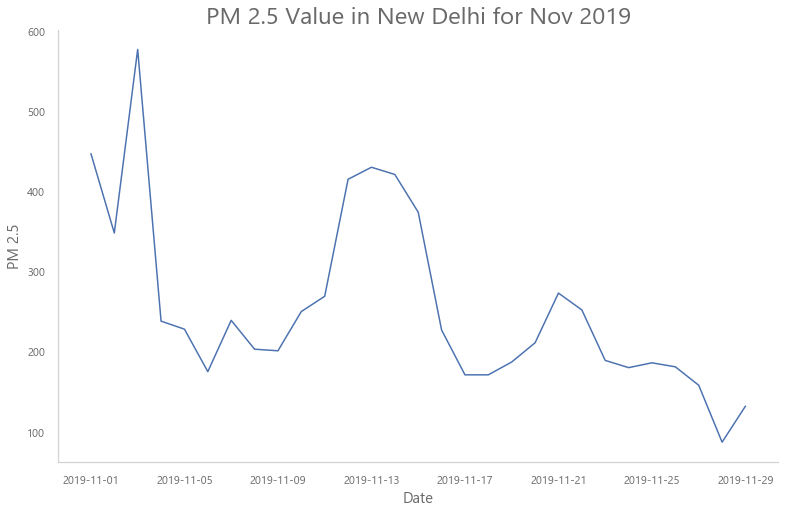

In [94]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_axes([0,0,1,1])
ax.set_title('PM 2.5 Value in New Delhi for Nov 2019', fontsize = 24)
ax.plot(nov2019.Date, nov2019.Median)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('PM 2.5', fontsize = 15)
plt.show()

In [95]:
lastyearNO2 = pd.read_csv('NewDelhi2019NO2.csv')
lastyearNO2.Date  = pd.to_datetime(lastyearNO2.Date, dayfirst = True)

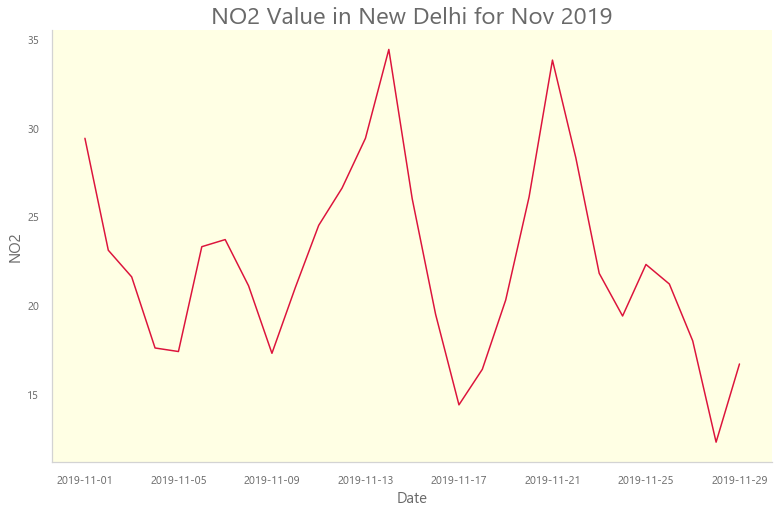

In [97]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_axes([0,0,1,1])
ax.set_title('NO2 Value in New Delhi for Nov 2019', fontsize = 24)
ax.plot(lastyearNO2.Date, lastyearNO2.Median, color = 'crimson')
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('NO2', fontsize = 15)
ax.set_facecolor('xkcd:off white')
#plt.grid(color = 'k')
plt.show()

# Phase-wise Breakdown of the Nationwide Lockdown

We can see from the COVID-19 timeline, the lockdown can be broadly broken down into three categories for New Delhi- 

### Lockdown A - Complete Lockdown (March 25 to May 3)
No travel across state borders or within the city, all non-essential businesses shut down. Only essential workers, hospital staff and patients allowed to travel. 

### Lockdown B -  Some Restrictions Lifted (May 3 to May 17)
The nation is divided into red, orange and green zones. Restrictions are slowly lifted in green and orange zones. Sale of liquor is allowed. 

### Lockdown C -  More Restrictions Lifted (May 18 onwards)
Individual shops, sports complexes and stadiums opening up. E-commerce of non-essential items is now allowed. Travel restrictions are being lifted, such as the ban on domestic passenger air travel and special trains are being run for stranded students and migrant workers.  

In [99]:
phaseA = data.loc[(data['Date'] >=  '2020-03-25')&(data['Date'] <= '2020-05-02')]
print("Days in Phase A:")
print(phaseA.Date.count())

Days in Phase A:
39


In [100]:
phaseB = data.loc[(data['Date'] >=  '2020-05-03')&(data['Date'] <= '2020-05-17')]
print("Days in Phase B:")
print(phaseB.Date.count())

Days in Phase B:
15


In [101]:
phaseC = data.loc[(data['Date'] >=  '2020-05-18')&(data['Date'] <= '2020-05-26')]
print("Days in Phase C (ongoing):")
print(phaseC.Date.count())

Days in Phase C (ongoing):
9


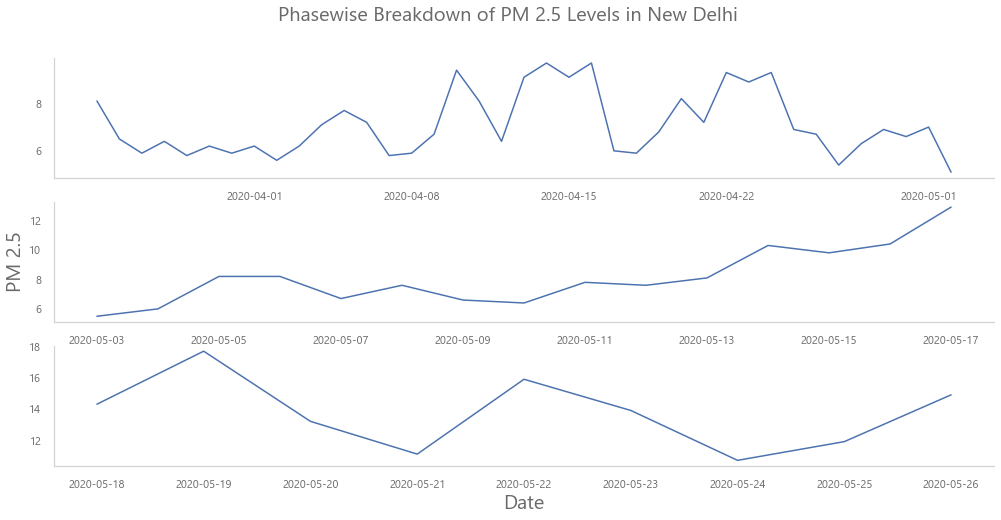

In [114]:
fig = plt.figure(figsize = (15, 7))
fig.suptitle('Phasewise Breakdown of PM 2.5 Levels in New Delhi', fontsize = 20)

ax1 = fig.add_subplot(311)
ax1.plot(phaseA.Date, phaseA.Median)
#ax1.set_xlabel('Date', fontsize = 15)
#ax1.set_ylabel('PM 2.5', fontsize = 15)


ax2 = fig.add_subplot(312)
ax2.plot(phaseB.Date, phaseB.Median)
#ax2.set_xlabel('Date', fontsize = 15)
ax2.set_ylabel('PM 2.5', fontsize = 20)

ax3 = fig.add_subplot(313)
ax3.plot(phaseC.Date, phaseC.Median)
ax3.set_xlabel('Date', fontsize = 20)
#ax3.set_ylabel('PM 2.5', fontsize = 15)

#fig.tight_layout()
plt.show()

In [167]:
phaseA.Median.mean()

105.3076923076923

In [161]:
phaseB.Median.mean()

122.53333333333333

In [162]:
phaseC.Median.mean()

147.77777777777777

In [104]:
dataNO2 = pd.read_csv('NewDelhi2020NO2.csv')
dataNO2.Date  = pd.to_datetime(dataNO2.Date, dayfirst = True)
dataNO2.head()

,Date,Country,City,Indicator,Count,Min,Max,Median,Vaiance
0,2020-01-01,IN,Delhi,no2,881,0.1,102.7,21.1,4069.31
1,2020-01-02,IN,Delhi,no2,893,0.1,115.1,21.0,4492.76
2,2020-01-03,IN,Delhi,no2,865,1.1,100.6,18.8,3704.01
3,2020-01-04,IN,Delhi,no2,812,0.6,108.5,21.2,4223.71
4,2020-01-05,IN,Delhi,no2,815,2.1,95.9,20.2,2406.46


In [105]:
phaseA = dataNO2.loc[(dataNO2['Date'] >=  '2020-03-25')&(dataNO2['Date'] <= '2020-05-02')]
phaseB = dataNO2.loc[(dataNO2['Date'] >=  '2020-05-03')&(dataNO2['Date'] <= '2020-05-17')]
phaseC = dataNO2.loc[(dataNO2['Date'] >=  '2020-05-18')&(dataNO2['Date'] <= '2020-05-26')]

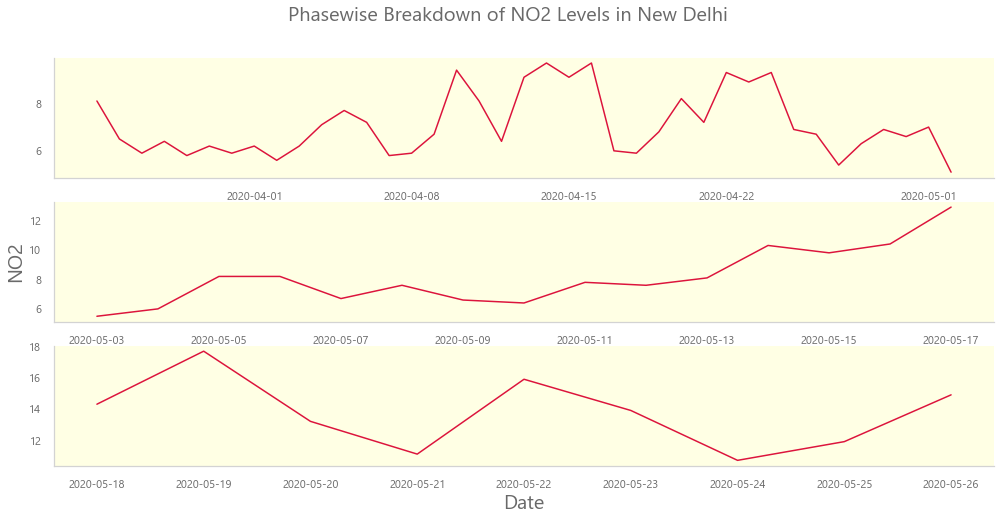

In [116]:
fig = plt.figure(figsize = (15, 7))
fig.suptitle('Phasewise Breakdown of NO2 Levels in New Delhi', fontsize = 20)

ax1 = fig.add_subplot(311)
ax1.plot(phaseA.Date, phaseA.Median, color = 'crimson')
#ax1.set_xlabel('Date', fontsize = 15)
#ax1.set_ylabel('NO2', fontsize = 15)
ax1.set_facecolor('xkcd:off white')

ax2 = fig.add_subplot(312)
ax2.plot(phaseB.Date, phaseB.Median, color = 'crimson')
#ax2.set_xlabel('Date', fontsize = 15)
ax2.set_ylabel('NO2', fontsize = 20)
ax2.set_facecolor('xkcd:off white')


ax3 = fig.add_subplot(313)
ax3.plot(phaseC.Date, phaseC.Median, color = 'crimson')
ax3.set_xlabel('Date', fontsize = 20)
#ax3.set_ylabel('NO2', fontsize = 15)
ax3.set_facecolor('xkcd:off white')

plt.show()

In [230]:
phaseA.Median.mean()

7.107692307692309

In [231]:
phaseB.Median.mean()

8.139999999999999

In [232]:
phaseC.Median.mean()

13.733333333333336

# The cure for the common smog?

We should make the most of the situation we are in. That mentality is what separates the succesful from the others.

MOst people look at the data and see how the lockdown restrictions improved the quality of the air we breathe. As time went on and we carefully attempted to return to normalcy via a staggered exit, leading to a phased relaxation of restrictions, the pollutant levels in our air naturally went up. 

But if we look from another perspective, you see that, in reverse, we have the relation between air pollutant levels and the strictness of the lockdown. We can see the air quality improve as the restrictions are increased (until we reach the first phase of complete and total lockdown, with the best ever air quality Delhi has seen in a while). 

Using data science we can now attempt to predict, given the current levels of pollution, what the levels will be in 'n' days if restrictions such as those in any given phase are applied. We can see if any of these attempts to reduce air pollution work, and if they are viable the Delhi administration could turn to alternative schemes like these in the winter months to help ensure the safety and health of the residents of the national capital!


In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
data = pd.read_csv('Phase B Reversed.csv')
data.head()

,Day,NO2 Level,PM 25 Level,NO2Change,PM25Change
0,1,12.9,160,9.790210,0.621118
1,2,10.4,154,27.272727,4.347826
2,3,9.8,107,31.468531,33.540373
3,4,10.3,134,27.972028,16.770186
4,5,8.1,153,43.356643,4.968944


 We start with looking at Phase B. Reversing the data, and looking at the values of NO2 and PM 2.5 _before_ Phase B restrictions were put in place, we calculated the percentage drop in pollutant levels. The initial NO2 level was 14.3 and the PM 2.5 level was 161. 

In [151]:
data = pd.read_csv('Phase B Reversed.csv')
data = data.rename(columns={'Day ': 'Day'})

In [152]:
X = data.Day.values.reshape(-1, 1)
Y = data.NO2Change.values.reshape(-1, 1)  

In [153]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

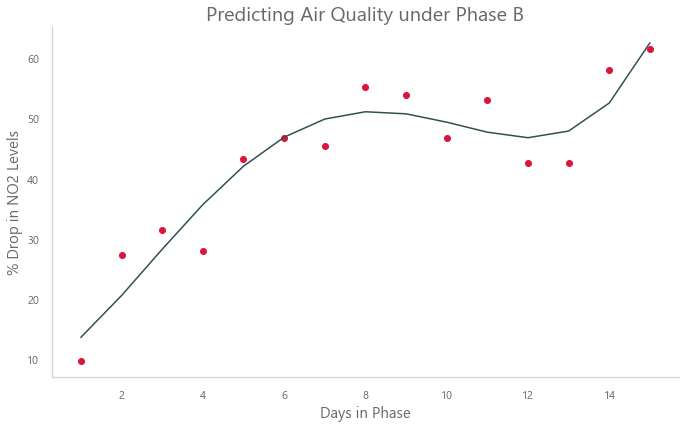

In [141]:
fig = plt.figure(figsize = (10, 6))
plt.title('Predicting Air Quality under Phase B', fontsize = 20)
plt.scatter(X, Y, color = 'crimson')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color = 'darkslategray')
plt.xlabel('Days in Phase', fontsize = 15)
plt.ylabel('% Drop in NO2 Levels', fontsize = 15)
plt.show()

In [11]:
def NO2AfterXDays(days, initialVal):
    print(initialVal - (0.01*initialVal * pol_reg.predict(poly_reg.fit_transform([[days]]))))

We defined a function to predict the NO<sub>2</sub> levels after 'X' days, given the initial level of pollution. This is if rules as strict as Phase B are applied in Delhi. <br>Let's see what we get - 

In [12]:
#10 Days of Phase B restrictions, initial level of NO2 is 88 (which is what it was after Diwali 2018)
NO2AfterXDays(10, 88)

[[44.53042139]]


In [13]:
# 1 week of Phase B restrictions, initial level of NO2 is 45
NO2AfterXDays(7, 45)

[[22.53775566]]


We can repeat the process above to predict the PM 2.5 level safter 'X' days, given the initial level of pollution in Delhi - 


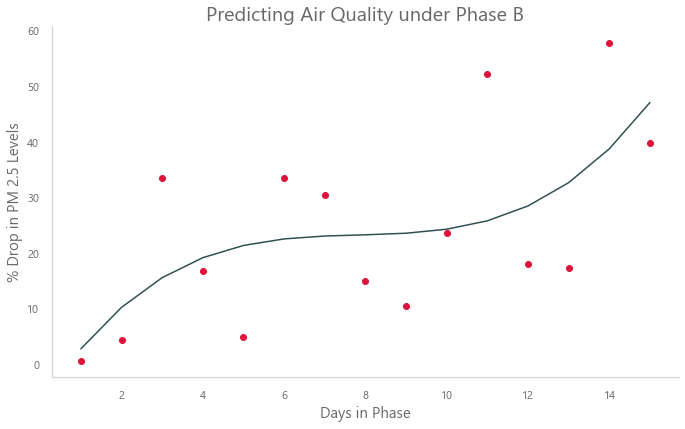

In [154]:
X = data.Day.values.reshape(-1, 1)
Y = data.PM25Change.values.reshape(-1, 1)  

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

fig = plt.figure(figsize = (10, 6))
plt.title('Predicting Air Quality under Phase B', fontsize = 20)
plt.scatter(X, Y, color = 'crimson')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)),  color = 'darkslategray')
plt.xlabel('Days in Phase', fontsize = 15)
plt.ylabel('% Drop in PM 2.5 Levels', fontsize = 15)
plt.show()

In [155]:
def PM25AfterXDays(days, initialVal):
    print(initialVal - (0.01*initialVal * pol_reg.predict(poly_reg.fit_transform([[days]]))))

In [157]:
#10 Days of Phase B restrictions, initial level of PM 2.5 is 160
PM25AfterXDays(10, 160)

[[121.16715404]]


In [165]:
PM25AfterXDays(19, 180)

[[-18.15050976]]
